In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")

In [3]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN


In [4]:
print(df.shape)

(137700, 16)


In [5]:
print(df.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98270 non-null   float64
 10  Total Deaths        

In [7]:
print(df.describe(include='all'))

        Data As Of  Start Date    End Date     Group           Year  \
count       137700      137700      137700    137700  134946.000000   
unique           1          45          45         3            NaN   
top     09/27/2023  01/01/2020  09/23/2023  By Month            NaN   
freq        137700        8262        8262    123930            NaN   
mean           NaN         NaN         NaN       NaN    2021.408163   
std            NaN         NaN         NaN       NaN       1.086439   
min            NaN         NaN         NaN       NaN    2020.000000   
25%            NaN         NaN         NaN       NaN    2020.000000   
50%            NaN         NaN         NaN       NaN    2021.000000   
75%            NaN         NaN         NaN       NaN    2022.000000   
max            NaN         NaN         NaN       NaN    2023.000000   

                Month          State        Sex Age Group  COVID-19 Deaths  \
count   123930.000000         137700     137700    137700     9.82700

In [8]:
# Check for missing values
print(df.isnull().sum())

Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         2754
Month                                       13770
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                             39430
Total Deaths                                19509
Pneumonia Deaths                            44864
Pneumonia and COVID-19 Deaths               36884
Influenza Deaths                            26688
Pneumonia, Influenza, or COVID-19 Deaths    44233
Footnote                                    39804
dtype: int64


In [9]:
#Data cleaning
for col in df.columns:
    if df[col].dtype == 'object':
        # Fill string (object) columns with mode
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:
        # Fill numeric columns with integer mean
        mean_val = int(df[col].mean())
        df[col] = df[col].fillna(mean_val)

In [10]:
df = df.drop_duplicates()

In [11]:
# Drop unnecessary columns
df.drop(columns=["Year","Month","Footnote"], inplace=True)
print(df.shape)

(137700, 13)


In [12]:
# Check unique values in categorical columns
print(df['Sex'].unique())
print(df['Age Group'].unique())

['All Sexes' 'Male' 'Female']
['All Ages' 'Under 1 year' '0-17 years' '1-4 years' '5-14 years'
 '15-24 years' '18-29 years' '25-34 years' '30-39 years' '35-44 years'
 '40-49 years' '45-54 years' '50-64 years' '55-64 years' '65-74 years'
 '75-84 years' '85 years and over']


In [13]:
# Final check for missing values
print(df.isnull().sum())

Data As Of                                  0
Start Date                                  0
End Date                                    0
Group                                       0
State                                       0
Sex                                         0
Age Group                                   0
COVID-19 Deaths                             0
Total Deaths                                0
Pneumonia Deaths                            0
Pneumonia and COVID-19 Deaths               0
Influenza Deaths                            0
Pneumonia, Influenza, or COVID-19 Deaths    0
dtype: int64


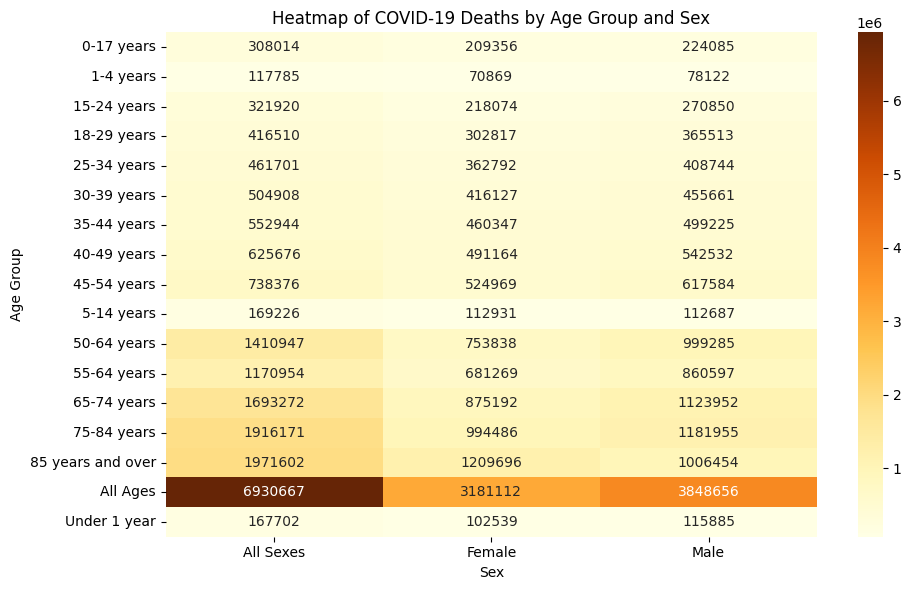

In [14]:
#visualization


pivot_table = df.pivot_table(values='COVID-19 Deaths', index='Age Group', columns='Sex', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Heatmap of COVID-19 Deaths by Age Group and Sex")
plt.ylabel("Age Group")
plt.xlabel("Sex")
plt.tight_layout()
plt.show()

In [15]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Year'] = df['Start Date'].dt.year
yearly_df = df.groupby('Year')['COVID-19 Deaths'].sum().reset_index()

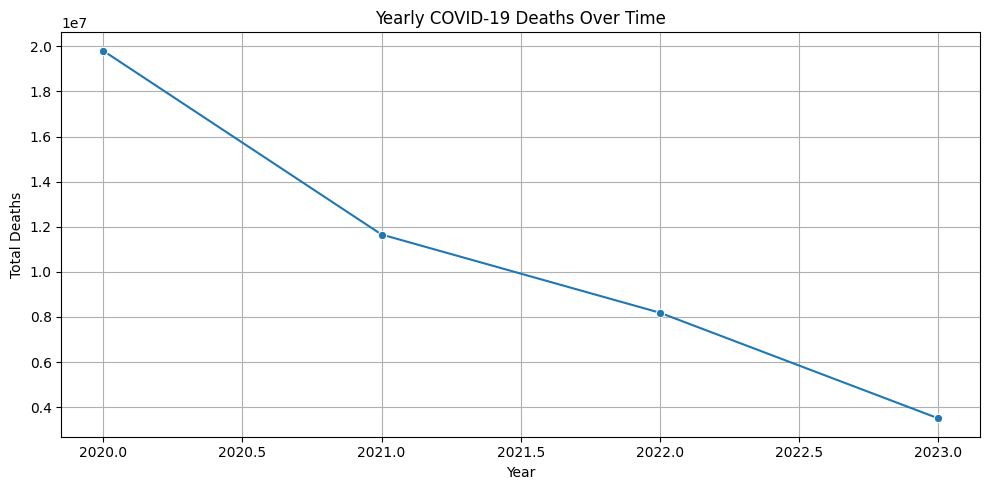

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_df, x='Year', y='COVID-19 Deaths', marker='o')
plt.title("Yearly COVID-19 Deaths Over Time")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

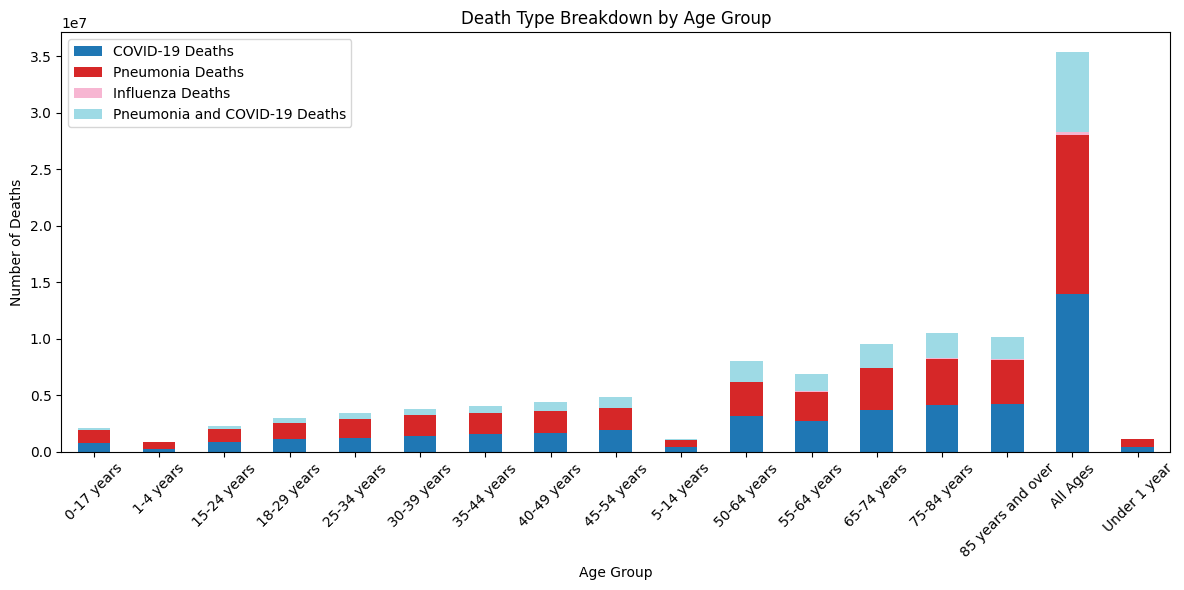

In [18]:
stacked_df = df.groupby('Age Group')[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia and COVID-19 Deaths']].sum().reset_index()
stacked_df.set_index('Age Group').plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Death Type Breakdown by Age Group")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

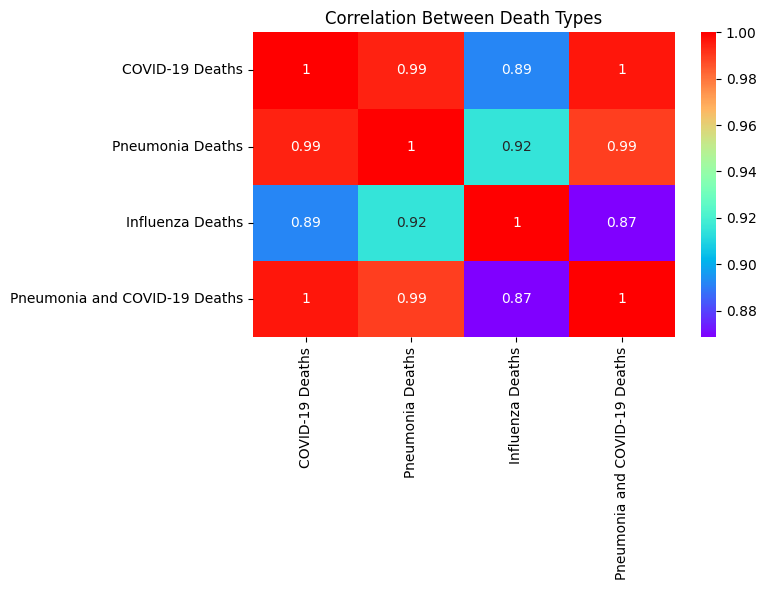

In [21]:
death_corr = df[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia and COVID-19 Deaths']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(death_corr, annot=True, cmap='rainbow')
plt.title("Correlation Between Death Types")
plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px

In [25]:
top_states = df.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_states, x='State', y='COVID-19 Deaths', color='COVID-19 Deaths', title="Top 10 States by COVID-19 Deaths")
fig.show()


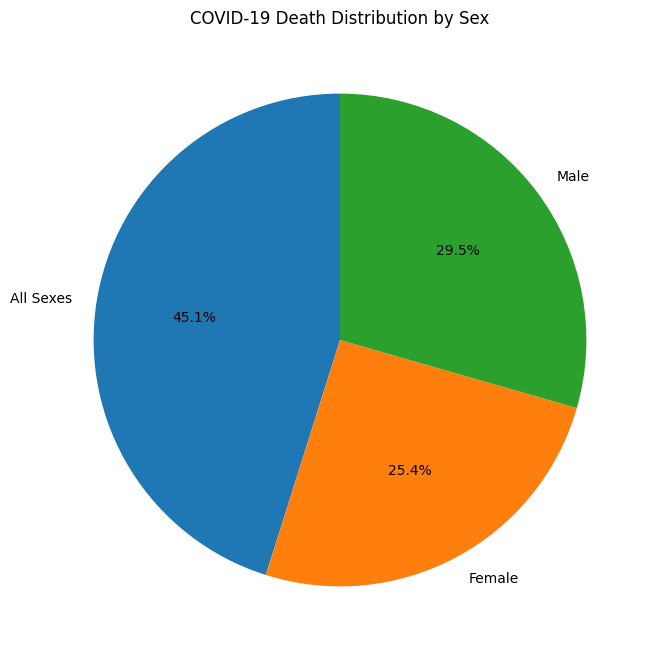

In [ ]:
# Plot using matplotlib to create a pie chart
sex_dist = df.groupby('Sex')['COVID-19 Deaths'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sex_dist['COVID-19 Deaths'], labels=sex_dist['Sex'], autopct='%1.1f%%', startangle=90)
plt.title('COVID-19 Death Distribution by Sex')
plt.show()

In [22]:
# Encode 'Sex' column (e.g., Male=0, Female=1)
df['Sex_encoded'] = df['Sex'].map({'Male': 0, 'Female': 1})

In [23]:
# Group and aggregate the data
sex_dist = df.groupby('Sex_encoded')['COVID-19 Deaths'].sum().reset_index()

In [24]:
# Prepare input (X) and output (y)
X = sex_dist[['Sex_encoded']]  # independent variable
y = sex_dist['COVID-19 Deaths']  # dependent variable

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
# Predict
y_pred = model.predict(X)

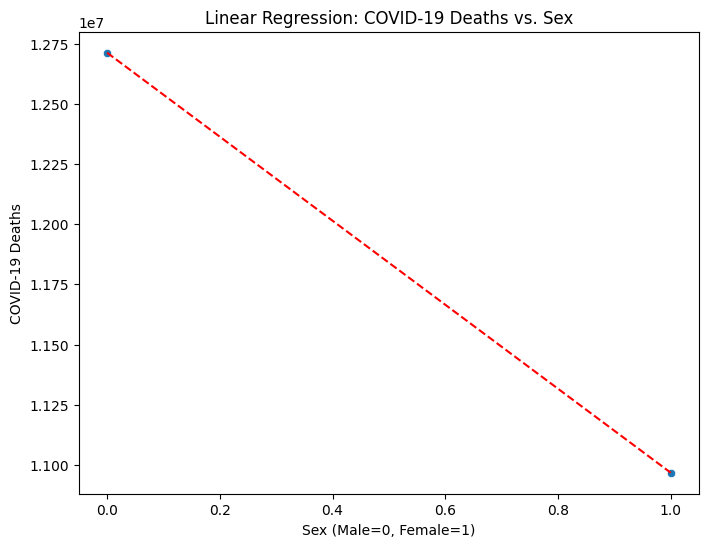

In [29]:
# Plot the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sex_encoded', y='COVID-19 Deaths', data=sex_dist)
plt.plot(X, y_pred, color='red', linestyle='--')
plt.title('Linear Regression: COVID-19 Deaths vs. Sex')
plt.xlabel('Sex (Male=0, Female=1)')
plt.ylabel('COVID-19 Deaths')
plt.show()